In [27]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import matplotlib
import random as rd
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import math
import itertools as it
import seaborn as sn

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [28]:
def count_permutationlist(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(len(df)-d+1):
        slice_df = df[i:i+d]
        sort_slice = sorted(slice_df)
        for j in range(d):
            slice_df[slice_df.index(sort_slice[j])] = j
        count_p[perm.index(tuple(slice_df))] += 1
    return count_p
def count_permutation(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(df.size-d+1):
        slice_df = df.copy().iloc[i:i+d]
        sort_slice = slice_df.copy().sort_values()
        for j in range(d):
            slice_df[slice_df[slice_df == sort_slice.iloc[j]].first_valid_index()] =  j
        count_p[perm.index(tuple(slice_df.tolist()))] += 1
    return count_p
def entropy(perm:list):
    allperm = sum(perm)
    ent = 0
    for i in range(len(perm)):
        probability = perm[i]/allperm
        if probability !=0:
            ent -= probability * math.log2(probability)
    return ent

In [29]:
def fun(X, alp: float, beta: float, max_kf: float, trend: float, season: float):
    j = 2
    k = 2
    for i in X[2:]:
        X[i] = (alp * X[i-dt.timedelta(1/24)] + beta * X[i-dt.timedelta(2/24)]) + rd.uniform(-max_kf, max_kf) + trend * j
        if k%(7*24)==0:
            X[i]+=season
        if k%(7*24)==1:
            X[i]-=season
        k+=1
    return X

In [30]:
def walds_martingale(X, sigma, tetta):
    s = np.random.normal(0, np.sqrt(sigma), X.shape[0])  
    z=np.cumsum(s)
    for i in range(len(z)):
        z[i] = np.exp(tetta * z[i] - 0.5 * tetta**2 *i)
    X.values = z
    return X
def random_walk(X, noise):
    X[0] = 0
    X[1] = X.index[1]
    for i in X[1:]:
        X[i] = X[i-dt.timedelta(1/24)] + np.random.normal(0, noise)
    return X
def uf_random_walk(X, noise):
    X[0] = 0
    X[1] = X.index[1]
    for i in X[1:]:
        X[i] = X[i-dt.timedelta(1/24)] + np.random.uniform(-noise, noise)
    return X
def radical_random_walk(X, noise):
    X[0] = 0
    X[1] = X.index[1]
    for i in X[1:]:
        X[i] = X[i-dt.timedelta(1/24)] + rd.choice([-noise, noise])
    return X

Задача: проверить функцию count_permutation на правильное исполнение. Почему такие результаты на случайном блуждании?

In [31]:
datelist = pd.date_range(start='29/06/2023 00:00:00', end='29/07/2023', freq='H').to_series()
datelist.index = datelist
datelist['29/06/2023 00:00:00'] = 5000.0
datelist['29/06/2023 01:00:00'] = 5015.0

In [32]:
datelist = pd.date_range(start='29/06/2023 00:00:00', end='30/06/2023', freq='H').to_series()
datelist.index = datelist
datelist['29/06/2023 00:00:00'] = 5000.0
datelist['29/06/2023 01:00:00'] = 5015.0

In [10]:
rw = random_walk(datelist.copy(),5)

<AxesSubplot:>

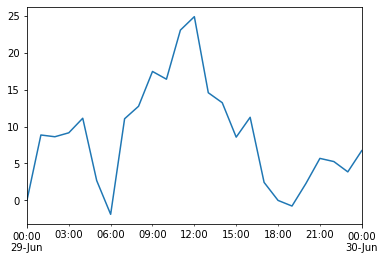

In [11]:
rw.plot()

In [12]:
rw

2023-06-29 00:00:00            0
2023-06-29 01:00:00     8.857806
2023-06-29 02:00:00     8.620619
2023-06-29 03:00:00     9.155728
2023-06-29 04:00:00    11.128344
2023-06-29 05:00:00     2.683478
2023-06-29 06:00:00    -1.882531
2023-06-29 07:00:00    11.055087
2023-06-29 08:00:00    12.747127
2023-06-29 09:00:00    17.461275
2023-06-29 10:00:00    16.413609
2023-06-29 11:00:00     23.05827
2023-06-29 12:00:00    24.882574
2023-06-29 13:00:00    14.578538
2023-06-29 14:00:00    13.229257
2023-06-29 15:00:00     8.566301
2023-06-29 16:00:00    11.254366
2023-06-29 17:00:00      2.43878
2023-06-29 18:00:00     0.000175
2023-06-29 19:00:00    -0.761469
2023-06-29 20:00:00     2.298423
2023-06-29 21:00:00     5.690011
2023-06-29 22:00:00     5.261197
2023-06-29 23:00:00     3.864988
2023-06-30 00:00:00     6.739014
dtype: object

In [13]:
count_permutation(rw.copy(), 2)

[12, 12]

Верно

In [14]:
count_permutation(rw.copy(), 3)

[5, 3, 5, 3, 1, 6]

In [16]:
list(it.permutations(range(3)))

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

In [18]:
rw1 = random_walk(datelist.copy(),5)

In [19]:
rw1

2023-06-29 00:00:00            0
2023-06-29 01:00:00     6.707942
2023-06-29 02:00:00    -3.885545
2023-06-29 03:00:00   -13.855889
2023-06-29 04:00:00     3.351607
2023-06-29 05:00:00    -2.485973
2023-06-29 06:00:00    -0.986674
2023-06-29 07:00:00     -6.33024
2023-06-29 08:00:00    -1.601764
2023-06-29 09:00:00     -0.71588
2023-06-29 10:00:00     0.412549
2023-06-29 11:00:00    -0.454963
2023-06-29 12:00:00     7.348013
2023-06-29 13:00:00     9.752025
2023-06-29 14:00:00    16.387399
2023-06-29 15:00:00    15.942238
2023-06-29 16:00:00    20.438825
2023-06-29 17:00:00    20.338934
2023-06-29 18:00:00    20.471251
2023-06-29 19:00:00    17.032173
2023-06-29 20:00:00        9.202
2023-06-29 21:00:00     7.764833
2023-06-29 22:00:00      9.78714
2023-06-29 23:00:00     9.030033
2023-06-30 00:00:00      3.93244
dtype: object

In [21]:
count_permutation(rw1.copy(), 2)

[12, 12]

In [23]:
count_permutation(rw1.copy(), 3)

[4, 5, 5, 3, 2, 4]

<AxesSubplot:>

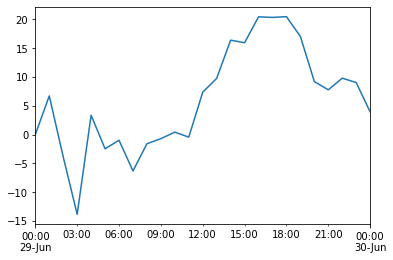

In [24]:
rw1.plot()

In [25]:
count_permutationlist(rw1.copy().tolist(), 3)

[4, 5, 5, 3, 2, 4]

In [33]:
datelist1 = pd.date_range(start='29/06/2023 00:00:00', end='30/06/2033', freq='H').to_series()
datelist1.index = datelist1
datelist1['29/06/2023 00:00:00'] = 5000.0
datelist1['29/06/2023 01:00:00'] = 5015.0

In [7]:
rw = random_walk(datelist1.copy(),5)

In [8]:
count_permutation(rw.copy(), 4)

[10895,
 5485,
 3632,
 3041,
 1807,
 2417,
 5480,
 2321,
 1819,
 2370,
 1303,
 3072,
 3107,
 1302,
 2384,
 1812,
 2369,
 5477,
 2310,
 1820,
 3080,
 3744,
 5502,
 11145]

<BarContainer object of 24 artists>

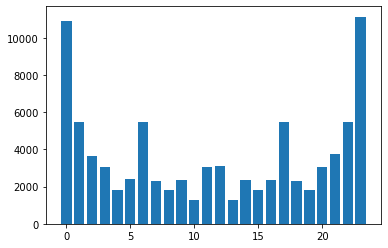

In [11]:
cp = [10895,
 5485,
 3632,
 3041,
 1807,
 2417,
 5480,
 2321,
 1819,
 2370,
 1303,
 3072,
 3107,
 1302,
 2384,
 1812,
 2369,
 5477,
 2310,
 1820,
 3080,
 3744,
 5502,
 11145]
plt.bar(range(len(cp)), cp)

<BarContainer object of 24 artists>

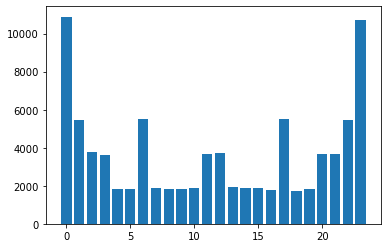

In [13]:
ufrw = uf_random_walk(datelist1.copy(),5)
ufcp = count_permutation(ufrw.copy(), 4)
plt.bar(range(len(ufcp)),ufcp)

In [16]:
r = list(range(4))
list(it.permutations(r))

[(0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 2, 1, 3),
 (0, 2, 3, 1),
 (0, 3, 1, 2),
 (0, 3, 2, 1),
 (1, 0, 2, 3),
 (1, 0, 3, 2),
 (1, 2, 0, 3),
 (1, 2, 3, 0),
 (1, 3, 0, 2),
 (1, 3, 2, 0),
 (2, 0, 1, 3),
 (2, 0, 3, 1),
 (2, 1, 0, 3),
 (2, 1, 3, 0),
 (2, 3, 0, 1),
 (2, 3, 1, 0),
 (3, 0, 1, 2),
 (3, 0, 2, 1),
 (3, 1, 0, 2),
 (3, 1, 2, 0),
 (3, 2, 0, 1),
 (3, 2, 1, 0)]

In [22]:
def strange_count_permutation(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(0,df.size-d+1,d):
        slice_df = df.copy().iloc[i:i+d]
        sort_slice = slice_df.copy().sort_values()
        for j in range(d):
            slice_df[slice_df[slice_df == sort_slice.iloc[j]].first_valid_index()] =  j
        count_p[perm.index(tuple(slice_df.tolist()))] += 1
    return count_p

<BarContainer object of 120 artists>

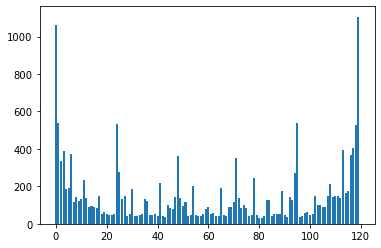

In [26]:
ufrw = uf_random_walk(datelist1.copy(),5)
ufcp = strange_count_permutation(ufrw.copy(), 5)
plt.bar(range(len(ufcp)),ufcp)

<BarContainer object of 24 artists>

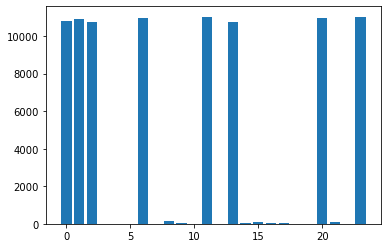

In [35]:
ufrw = radical_random_walk(datelist1.copy(),5)
ufcp = count_permutation(ufrw.copy(), 4)
plt.bar(range(len(ufcp)),ufcp)

In [36]:
ufcp

[10824,
 10893,
 10756,
 0,
 0,
 0,
 10942,
 0,
 127,
 61,
 0,
 11034,
 0,
 10729,
 58,
 75,
 47,
 53,
 0,
 0,
 10973,
 102,
 0,
 11020]

In [37]:
datelist2 = pd.date_range(start='29/06/2023 00:00:00', end='30/06/2043', freq='H').to_series()
datelist2.index = datelist2
datelist2['29/06/2023 00:00:00'] = 5000.0
datelist2['29/06/2023 01:00:00'] = 5015.0

<BarContainer object of 24 artists>

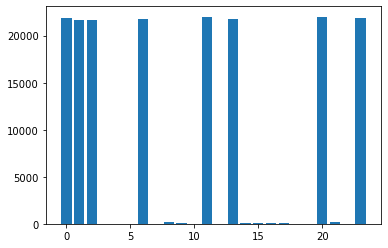

In [38]:
ufrw = radical_random_walk(datelist2.copy(),5)
ufcp = count_permutation(ufrw.copy(), 4)
plt.bar(range(len(ufcp)),ufcp)